# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [161]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

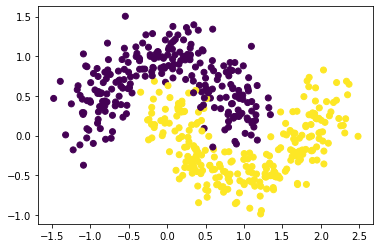

In [162]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [163]:
pip install mlxtend

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import itertools
import matplotlib.gridspec as gridspec

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


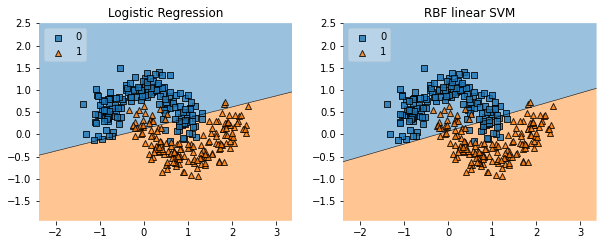

Accuracy score for Logistic Regression: 0.8545454545454545
Accuracy score for SVM classifier: 0.8666666666666667


In [165]:
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.33, random_state=42, stratify = moons_labels)

lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-4, max_iter=1000, class_weight='balanced') # add some params
svm = SVC(kernel='linear', gamma='auto', degree = 5, class_weight='balanced', shrinking=True) # here too

lr_clf = make_pipeline(StandardScaler(), lr)
svm_clf = make_pipeline(StandardScaler(), svm)

lr_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_test)
y_pred_svm = svm_clf.predict(X_test)

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))


labels = ['Logistic Regression',
          'RBF linear SVM']

for clf, lab, grd in zip([lr_clf, svm_clf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

print('Accuracy score for Logistic Regression: {0}'.format(accuracy_score(y_test, y_pred_lr)))
print('Accuracy score for SVM classifier: {0}'.format(accuracy_score(y_test, y_pred_svm)))

In [166]:
def plot_decisions(models, labels, X, y):
  gs = gridspec.GridSpec(2, 2)
  fig = plt.figure(figsize=(10, 8))

  for clf, lab, grd in zip(models, labels, itertools.product([0, 1], repeat=2)):
      ax = plt.subplot(gs[grd[0], grd[1]])
      fig = plot_decision_regions(X=X, y=y,
                                  clf=clf, legend=2)
      plt.title(lab)

  plt.show()

По результатам видно, что SVM с Linear kernel и Логистическая регрессия дают примерно одинаковую точность, так как оба метода пытаются разделить классы линейно и строят практически одну и ту же прямую. Высокой точности для таких методов ожидать не следует в данной задаче.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.m

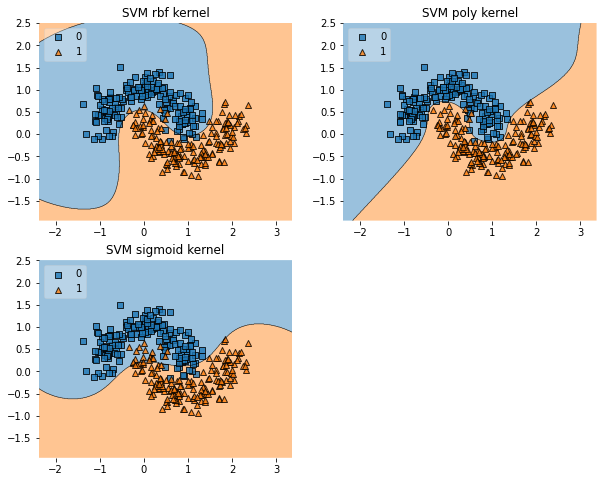

Accuracy score for SVM rbf kernel: 0.9878787878787879
Accuracy score for SVM poly kernel: 0.9939393939393939
Accuracy score for SVM sigmoid kernel: 0.9333333333333333


In [167]:
rbf = SVC(kernel='rbf', gamma='auto', degree = 5, tol=1e-3, max_iter=500, shrinking=True) 
poly = SVC(kernel='poly', gamma='scale', degree = 9, coef0 = 1, tol=1e-4, max_iter=500, shrinking=True) 
sigm = SVC(kernel='sigmoid', gamma='auto', degree = 15, coef0 = -1.5, tol=1e-5, max_iter=500, shrinking=True) 

rbf_clf = make_pipeline(StandardScaler(), rbf)
poly_clf = make_pipeline(StandardScaler(), poly)
sigm_clf = make_pipeline(StandardScaler(), sigm)

rbf_clf.fit(X_train, y_train)
poly_clf.fit(X_train, y_train)
sigm_clf.fit(X_train, y_train)

y_pred_rbf = rbf_clf.predict(X_test)
y_pred_poly = poly_clf.predict(X_test)
y_pred_sigm = sigm_clf.predict(X_test)

labels = ['SVM rbf kernel', 'SVM poly kernel', 'SVM sigmoid kernel']

plot_decisions([rbf_clf, poly_clf, sigm_clf], labels, X_train, y_train)

print('Accuracy score for SVM rbf kernel: {0}'.format(accuracy_score(y_test, y_pred_rbf)))
print('Accuracy score for SVM poly kernel: {0}'.format(accuracy_score(y_test, y_pred_poly)))
print('Accuracy score for SVM sigmoid kernel: {0}'.format(accuracy_score(y_test, y_pred_sigm)))

Для каждого из ядер получили заметное увеличение точности. Для poly kernel accuracy составила практически 1.0. При этом разделяющая кривая в данном случае оказалась нелинейной, так как каждое из ядер использует нелинейные методы. Для rbf kernel разделяющая кривая получилась замкнутой в отличие от остальных двух. Помимо этого для poly kernel была выбрана нечетная degree, так как в случае четной степени получаемая accuracy составила около 0.5. Также важным параметром для poly и sigmoid является свободный коэффициент coef0, меняя coef0 и degree можно получить очень высокую accuracy.  

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


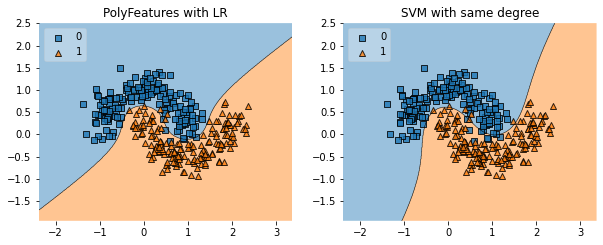

Accuracy score for PolyFeatures with LR: 0.9878787878787879
Accuracy score for SVM with same degree: 0.9878787878787879


In [168]:
from sklearn.preprocessing import PolynomialFeatures

### YOUR CODE HERE
svm_1_3 = SVC(kernel='poly', gamma='scale', degree = 3, coef0 = 5, tol=1e-4, max_iter=500, shrinking=True) 
lr_1_3 = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-4, max_iter=1000, class_weight='balanced')

lr_1_3_clf = make_pipeline(StandardScaler(), PolynomialFeatures(degree = 3), lr)
svm_1_3_clf = make_pipeline(StandardScaler(), svm_1_3)

lr_1_3_clf.fit(X_train, y_train)
svm_1_3_clf.fit(X_train, y_train)

y_pred_lr_1_3 = lr_1_3_clf.predict(X_test)
y_pred_svm_1_3 = svm_1_3_clf.predict(X_test)

labels = ['PolyFeatures with LR', 'SVM with same degree']

plot_decisions([lr_1_3_clf, svm_1_3_clf], labels, X_train, y_train)

print('Accuracy score for PolyFeatures with LR: {0}'.format(accuracy_score(y_test, y_pred_lr_1_3)))
print('Accuracy score for SVM with same degree: {0}'.format(accuracy_score(y_test, y_pred_svm_1_3)))

Применяя PolyFeatures для логистической регрессии получили примерно такую же accuracy и разделяющую кривую что и для poly svm и sigmoid svm в прошлом пункте. Путем перебора различных степеней, наиболее оптимальным получилось значение degree = 3. Если использовать такое же значение degree для poly svm то получаем такую же точность (при этом подобрав coef0).

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

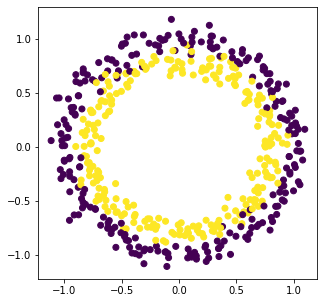

In [169]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

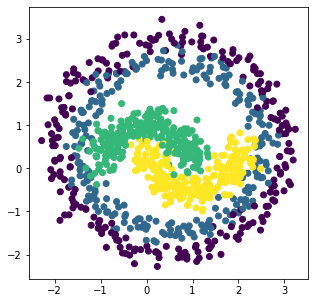

In [170]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [171]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.33, random_state=42, stratify = labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/

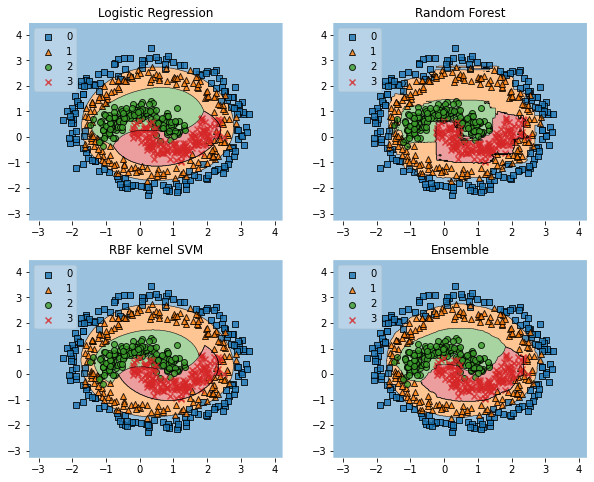

Accuracy score for PolyFeatures with LR: 0.906060606060606
Accuracy score for Random Forest: 0.896969696969697
Accuracy score for SVM with same degree: 0.9090909090909091
Accuracy score for Ensemble: 0.9151515151515152


In [172]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = make_pipeline(StandardScaler(),PolynomialFeatures(degree = 3), LogisticRegression(random_state=0, 
                  multi_class='multinomial', solver='saga', tol=1e-4, max_iter=1000, class_weight='balanced'))
clf2 = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0))
clf3 = make_pipeline(StandardScaler(), SVC(kernel = 'rbf', random_state=0, probability=True))
eclf = make_pipeline(StandardScaler(), EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[2, 1, 1], voting='soft'))


gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)
y_pred_e = eclf.predict(X_test)

print('Accuracy score for PolyFeatures with LR: {0}'.format(accuracy_score(y_test, y_pred_1)))
print('Accuracy score for Random Forest: {0}'.format(accuracy_score(y_test, y_pred_2)))
print('Accuracy score for SVM with same degree: {0}'.format(accuracy_score(y_test, y_pred_3)))
print('Accuracy score for Ensemble: {0}'.format(accuracy_score(y_test, y_pred_e)))

Видим, что все использованные алгоритмы дают примерно одинаковое значение для accuracy (около 0.9). При этом для svm rbf kernel и логистической регрессии с PolyFeatures (degree = 3) получилась гладкая разделяющая кривая, а для модели Случайного леса нет. Наибольшей точности удалось достичь применяя композицию этих алгоритмов.